In [37]:
import specdist as pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.collections import LineCollection
from matplotlib.ticker import LogLocator

scientific_notation = pi.scientific_notation

import warnings; warnings.simplefilter('ignore')

path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/run_scripts_photon_injection_paper/figures/"

xinj_to_mass = 4.698e-4 #m in ev = 4.698e-4 xinj
#1./4.698e-4*2. = 4257.130693912303

# sd_lib_bare = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('bare',sd_lib_bare)


# sd_lib_lyc = pi.specdist_ct_spectra_lib()
# pi.load_ct_spectra_lib('lyc',sd_lib_lyc)

label_y_firas = r'$y_\mathrm{COBE}=1.5\times 10^{-5}$'
label_mu_firas = r'$\mu_\mathrm{COBE}=9\times 10^{-5}$'

label_xe = 'FREE ELECTRON FRACTION, '+r'$X_\mathrm{e}$'
label_redshift = 'REDSHIFT, '+r'$z$'
label_mu_dist =  'CHEMICAL POTENTIAL, '+r'$\mu$'
label_injection_frequency = "SCALED INJECTION FREQUENCY, "+ r'$x_{\mathrm{inj,0}}$'
label_scaled_frequency = "SCALED FREQUENCY, "+ r'$x=h\nu/k_{_\mathrm{B}}T_{_\mathrm{CMB}}$'
label_intensity = "INTENSITY, "+r'$\Delta I_x \quad [\mathrm{Jy/sr}]$'

In [2]:


ct = pi.cosmotherm()
cosmo = pi.cosmo()
X_dm = pi.dm_particle()

pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)

ct.ct_Gamma_dec = 1e-14
pi.set_dm_params_to_CT_pi_params(X_dm,ct)

ct.ct_pi_redshift_evolution_mode=0
ct.ct_Drho_rho_dec = 0.
ct.ct_include_pi = 1 
ct.ct_evolve_Xe = 1
ct.ct_zend = 1e-2
ct.ct_fdm = 1e-5
ct.ct_lyc = 1



ct.ct_reionisation_model = 1

p_name = 'photon injection x_dec'
xinjs = [5e-8,5e-5,5e-2,5e1,5e4]

p_array = xinjs
ct.save_dir_name = 'case_reio'


args = {}
args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_spectra'] = 'yes'
ct.save_Xe = 'yes'
R = ct.run_cosmotherm_parallel(**args)



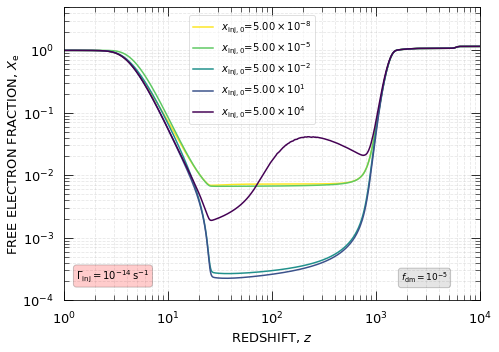

In [16]:
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 0.5



ymin=1e-4
ymax = 5e0
x_max = 1e4
x_min = 1
ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(label_redshift,size=title_size)
ax.set_ylabel(label_xe,size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(1,0,len(xinjs))))
for x in xinjs:
    ax.plot(R[i]['Xe_redshifts'],R[i]['Xe_values'],label=r'$x_\mathrm{inj,0}$='+scientific_notation(x),c=next(color))
    i+=1



ax.text(0.81, 0.1, r'$f_\mathrm{dm}=10^{-5}$', transform=ax.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.2))


ax.text(0.03, 0.11, r'$\Gamma_\mathrm{inj}=$'+scientific_notation(ct.ct_Gamma_dec)+r'$\,\mathrm{s}^{-1}$', transform=ax.transAxes, fontsize=10, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='r', alpha=0.2))


# plt.ylim(-2.,5)
#plt.xlim(1e-3,13)

ax.legend(loc=(0.3,0.6),ncol=1,frameon=True,framealpha=0.6,fontsize = 10)

fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_Xe_xinj.pdf')
plt.show()
plt.close(fig)

In [ ]:
ct = pi.cosmotherm()
cosmo = pi.cosmo()
X_dm = pi.dm_particle()
pi.set_dm_params_to_CT_pi_params(X_dm,ct)
pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)

xi_array = np.logspace(np.log10(1e1),np.log10(1.e8),200)
Gamma_inj_min = 1e-10
Gamma_inj_max = 1e-7
N_Gamma_inj = 4
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)
Mu_high_z = {}
Mu_high_z['curves'] = []
Mu_high_z['Gamma_inj'] = []

Drho_rho_tot = {}
Drho_rho_tot['Gamma_inj'] = []

for gamma in Gamma_values:
    mu_high_z = {}
    mu_high_z['x'] = xi_array
    mui = []
    for xi in xi_array:
        X_dm.x_0 = xi
        X_dm.Gamma_inj = gamma
        mui.append(pi.mu_continuous_injection(cosmo,ct,X_dm)['value'])
    mu_high_z['mu'] = np.asarray(mui)
    Mu_high_z['curves'].append(mu_high_z)
    Mu_high_z['Gamma_inj'].append(gamma)
    a_dict = {}
    a_dict['cosmotherm']=ct
    a_dict['dm_particle']=X_dm
    Drho_rho_tot['Gamma_inj'] = pi.Drho_rho_mu_from_energy_release_history(pi.pi_energy_release_history_dlnrho_dt,cosmo,**a_dict)   
        
    

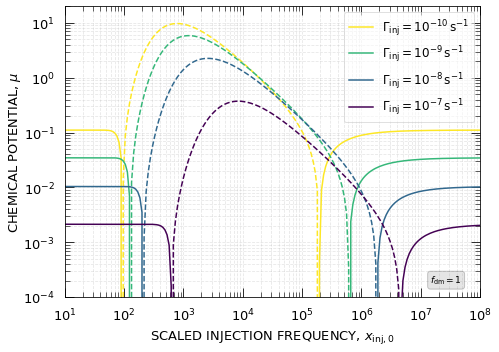

In [40]:


#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 1.5



ymin=1e-4
ymax = 2e1
x_min = 1e1
x_max = 1e8
ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_mu_dist,size=title_size)
ax.set_xlabel(label_injection_frequency,size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(1,0,len(Gamma_values))))
for gamma in Gamma_values:
    col = next(color)
    ax.plot(Mu_high_z['curves'][i]['x'],Mu_high_z['curves'][i]['mu'],c=col,label=r'$\Gamma_\mathrm{inj}=$'+scientific_notation(Mu_high_z['Gamma_inj'][i])+r'$\,\mathrm{s^{-1}}$')
    ax.plot(Mu_high_z['curves'][i]['x'],-Mu_high_z['curves'][i]['mu'],c=col,ls='--')
    i += 1


ax.text(0.88, 0.08, r'$f_\mathrm{dm}=1$', transform=ax.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.2))

# plt.ylim(-2.,5)
#plt.xlim(1e-3,13)

ax.legend(loc=1,ncol=1,frameon=True,framealpha=0.6,fontsize = 12)

fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_mu_int.pdf')
plt.show()
plt.close(fig)

In [129]:
Mu_high_z['Gamma_inj']



[1e-10, 1e-09, 1e-08, 1e-07]

In [43]:
id_gamma = 2

p_array = [1e1,1e4,1e7]
p_name = 'photon injection x_dec'

args = {}
args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_spectra'] = 'no'

ct = pi.cosmotherm()
ct.ct_pi_redshift_evolution_mode=0
ct.ct_Drho_rho_dec = 3e-5
ct.ct_include_pi = 1 
ct.ct_Gamma_dec = Mu_high_z['Gamma_inj'][id_gamma]

ct.ct_reionisation_model = 0
R = ct.run_cosmotherm_parallel(**args)

ct.ct_Drho_rho_dec = 1e-100
R_hubble = ct.run_cosmotherm_parallel(**args)




0.010423371893585916 10.0 10.0
-1.3209990286486668 10000.0 10000.0
0.00852800010380484 10000000.0 10000000.0


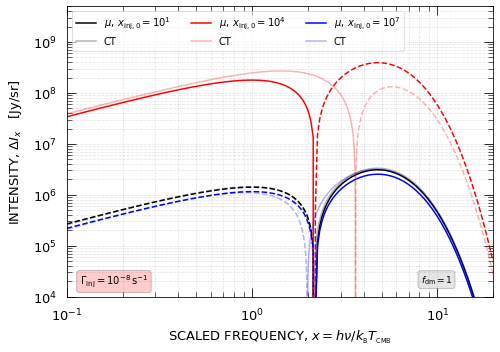

In [45]:
ct = pi.cosmotherm()
cosmo = pi.cosmo()
X_dm = pi.dm_particle()
pi.set_dm_params_to_CT_pi_params(X_dm,ct)
pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)

f = interp1d(Mu_high_z['curves'][id_gamma]['x'],Mu_high_z['curves'][id_gamma]['mu'])

Gamma_asked = Mu_high_z['Gamma_inj'][id_gamma]
X_dm.Gamma_inj = Gamma_asked
x_asked = np.logspace(-1,np.log10(20.),200)

fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 1.5



ymin=1e-2*1e6
ymax = 5e3*1e6
x_min = 1e-1
x_max = 20
ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_intensity,size=title_size)
ax.set_xlabel(label_scaled_frequency,size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


# ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
# ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
# for label in ax.yaxis.get_ticklabels()[::2]:
#     label.set_visible(False) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# # manipulate x-axis ticks and labels
# ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
# ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
# for label in ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=['k','r','b']
for x in p_array:
    col = color[i]
    xinj_asked = x
    X_dm.x_0 = xinj_asked
    
    mu = f(xinj_asked)

    DI_mu = pi.GetMuSpecDistAtTandX_chluba(mu,2.726,x_asked)*1e6
    ax.plot(x_asked,DI_mu,c=col,ls='-',label=r'$\mu,\,x_\mathrm{inj,0}=$'+scientific_notation(x))
    ax.plot(x_asked,-DI_mu,c=col,ls='--')

    print(mu,X_dm.x_0,R[i]['photon injection x_dec'])
    ax.plot(R[i]['x'],(R[i]['DI']-R_hubble[i]['DI'])*pi.f_inj(X_dm,cosmo)/R[i]['finj'],c=col,ls='-',alpha=0.3,label='CT')
    ax.plot(R[i]['x'],-(R[i]['DI']-R_hubble[i]['DI'])*pi.f_inj(X_dm,cosmo)/R[i]['finj'],c=col,ls='--',alpha=0.3)

    i += 1




ax.text(0.83, 0.08, r'$f_\mathrm{dm}=1$', transform=ax.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.2))

ax.text(0.03, 0.08, r'$\Gamma_\mathrm{inj}=$'+scientific_notation(Gamma_asked)+r'$\,\mathrm{s}^{-1}$', transform=ax.transAxes, fontsize=10, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='r', alpha=0.2))



ax.legend(loc=2,ncol=3,frameon=True,framealpha=0.6,fontsize = 10)

fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_mu_int_spectra.pdf')
plt.show()
plt.close(fig)

In [23]:
p_array = [1e-4,1e-2,1e0,1e2,1e4]
p_name = 'photon injection x_dec'

args = {}
args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_spectra'] = 'yes'

ct = pi.cosmotherm()
ct.ct_pi_redshift_evolution_mode=0
ct.ct_Drho_rho_dec = 3e-5
ct.ct_include_pi = 1 
ct.ct_Gamma_dec = 1e-20
ct.save_dir_name = 'case_G_1e-20' 
ct.ct_reionisation_model = 0
R = ct.run_cosmotherm_parallel(**args)

ct.ct_Drho_rho_dec = 1e-100
R_hubble = ct.run_cosmotherm_parallel(**args)

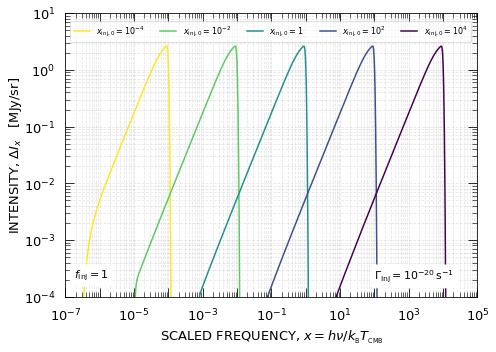

In [27]:


fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 0.8



ymin=1e-4
ymax = 1e1
x_min = 1e-7
x_max = 1e5
ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_intensity,size=title_size)
ax.set_xlabel(label_scaled_frequency,size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(1,0,len(p_array))))
for x in p_array:
    col = next(color)
    
    ax.plot(R[i]['x'],np.abs(R[i]['DI']-R_hubble[i]['DI'])/R[i]['finj']*1e-6,
            label=r'$x_\mathrm{inj,0}=$'+scientific_notation(x),c=col,ls='-')
    i += 1



ax.text(0.75, 0.1, r'$\Gamma_\mathrm{inj}=$'+scientific_notation(1e-20)+r'$\,\mathrm{s}^{-1}$', transform=ax.transAxes, 
        fontsize=11, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='white', alpha=1,edgecolor='white'))
ax.text(0.02, 0.1, r'$f_\mathrm{inj}=1$', transform=ax.transAxes, fontsize=11, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='white', alpha=1,edgecolor='white'))

# plt.ylim(-2.,5)
#plt.xlim(1e-3,13)

ax.legend(loc=(0.012,0.9),ncol=5,frameon=True,framealpha=0.6,fontsize = 8)

fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_long_lived_spectra.pdf')
plt.show()
plt.close(fig)

'1e+04'

In [2]:
ct = pi.cosmotherm()
cosmo = pi.cosmo()
X_dm = pi.dm_particle()
pi.set_dm_params_to_CT_pi_params(X_dm,ct)
pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
a_dict = {}
a_dict['cosmotherm']=ct
a_dict['dm_particle']=X_dm

zi = 2e6
xi_array = np.logspace(np.log10(1e-7),np.log10(20.),100)
mu_over_DN_N = []
mu_over_DN_N_continuous = []
for xi in xi_array:
    X_dm.x_0 = xi
    mui = pi.mu_instantaneous_injection(zi,cosmo,ct,X_dm)
    mu_over_DN_N.append(mui)
    
    mui_continuous = pi.mu_continuous_injection(cosmo,ct,X_dm)['value']/pi.DN_N_from_entropy_production_history(pi.pi_entropy_production_history_dlnN_dt,cosmo,**a_dict)['value']
    mu_over_DN_N_continuous.append(mui_continuous)

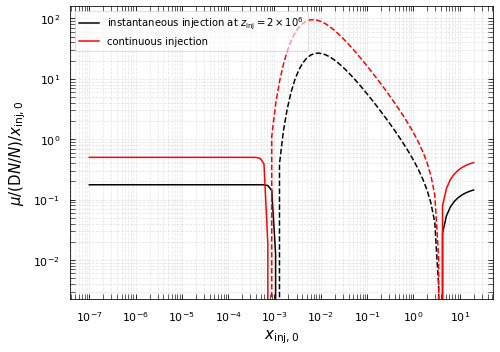

In [3]:
mu_over_DN_N = np.asarray(mu_over_DN_N)
mu_over_DN_N_continuous = np.asarray(mu_over_DN_N_continuous)

#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 11
title_size = 15
legend_size = 25
handle_length = 1.5




# ax.set_xlim(x_min,x_max)
# ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(r'$\mu/(\mathrm{D}N/N)/x_\mathrm{inj,0}$',size=title_size)
ax.set_xlabel(r'$x_\mathrm{inj,0}$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
# ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

# ax.plot(xi_array,mu_over_DN_N/xi_array,c='k',label='instantaneous injection')
# plt.ylim(-3.,0.5)
ax.plot(xi_array,(mu_over_DN_N)/xi_array,c='k',label='instantaneous injection at '+r'$z_\mathrm{inj}=2\times 10^6$')
ax.plot(xi_array,(mu_over_DN_N_continuous)/xi_array,c='r',label='continuous injection')
ax.plot(xi_array,-(mu_over_DN_N)/xi_array,c='k',ls='--')
ax.plot(xi_array,-(mu_over_DN_N_continuous)/xi_array,c='r',ls='--')




# plt.ylim(-2.,5)
#plt.xlim(1e-3,13)

ax.legend(loc=2,ncol=1,frameon=True,framealpha=0.6,fontsize = 10)

fig.tight_layout()
#plt.savefig(path_to_figures + '/figures_for_paper_mu_int.pdf')
plt.show()
plt.close(fig)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x181f666850>


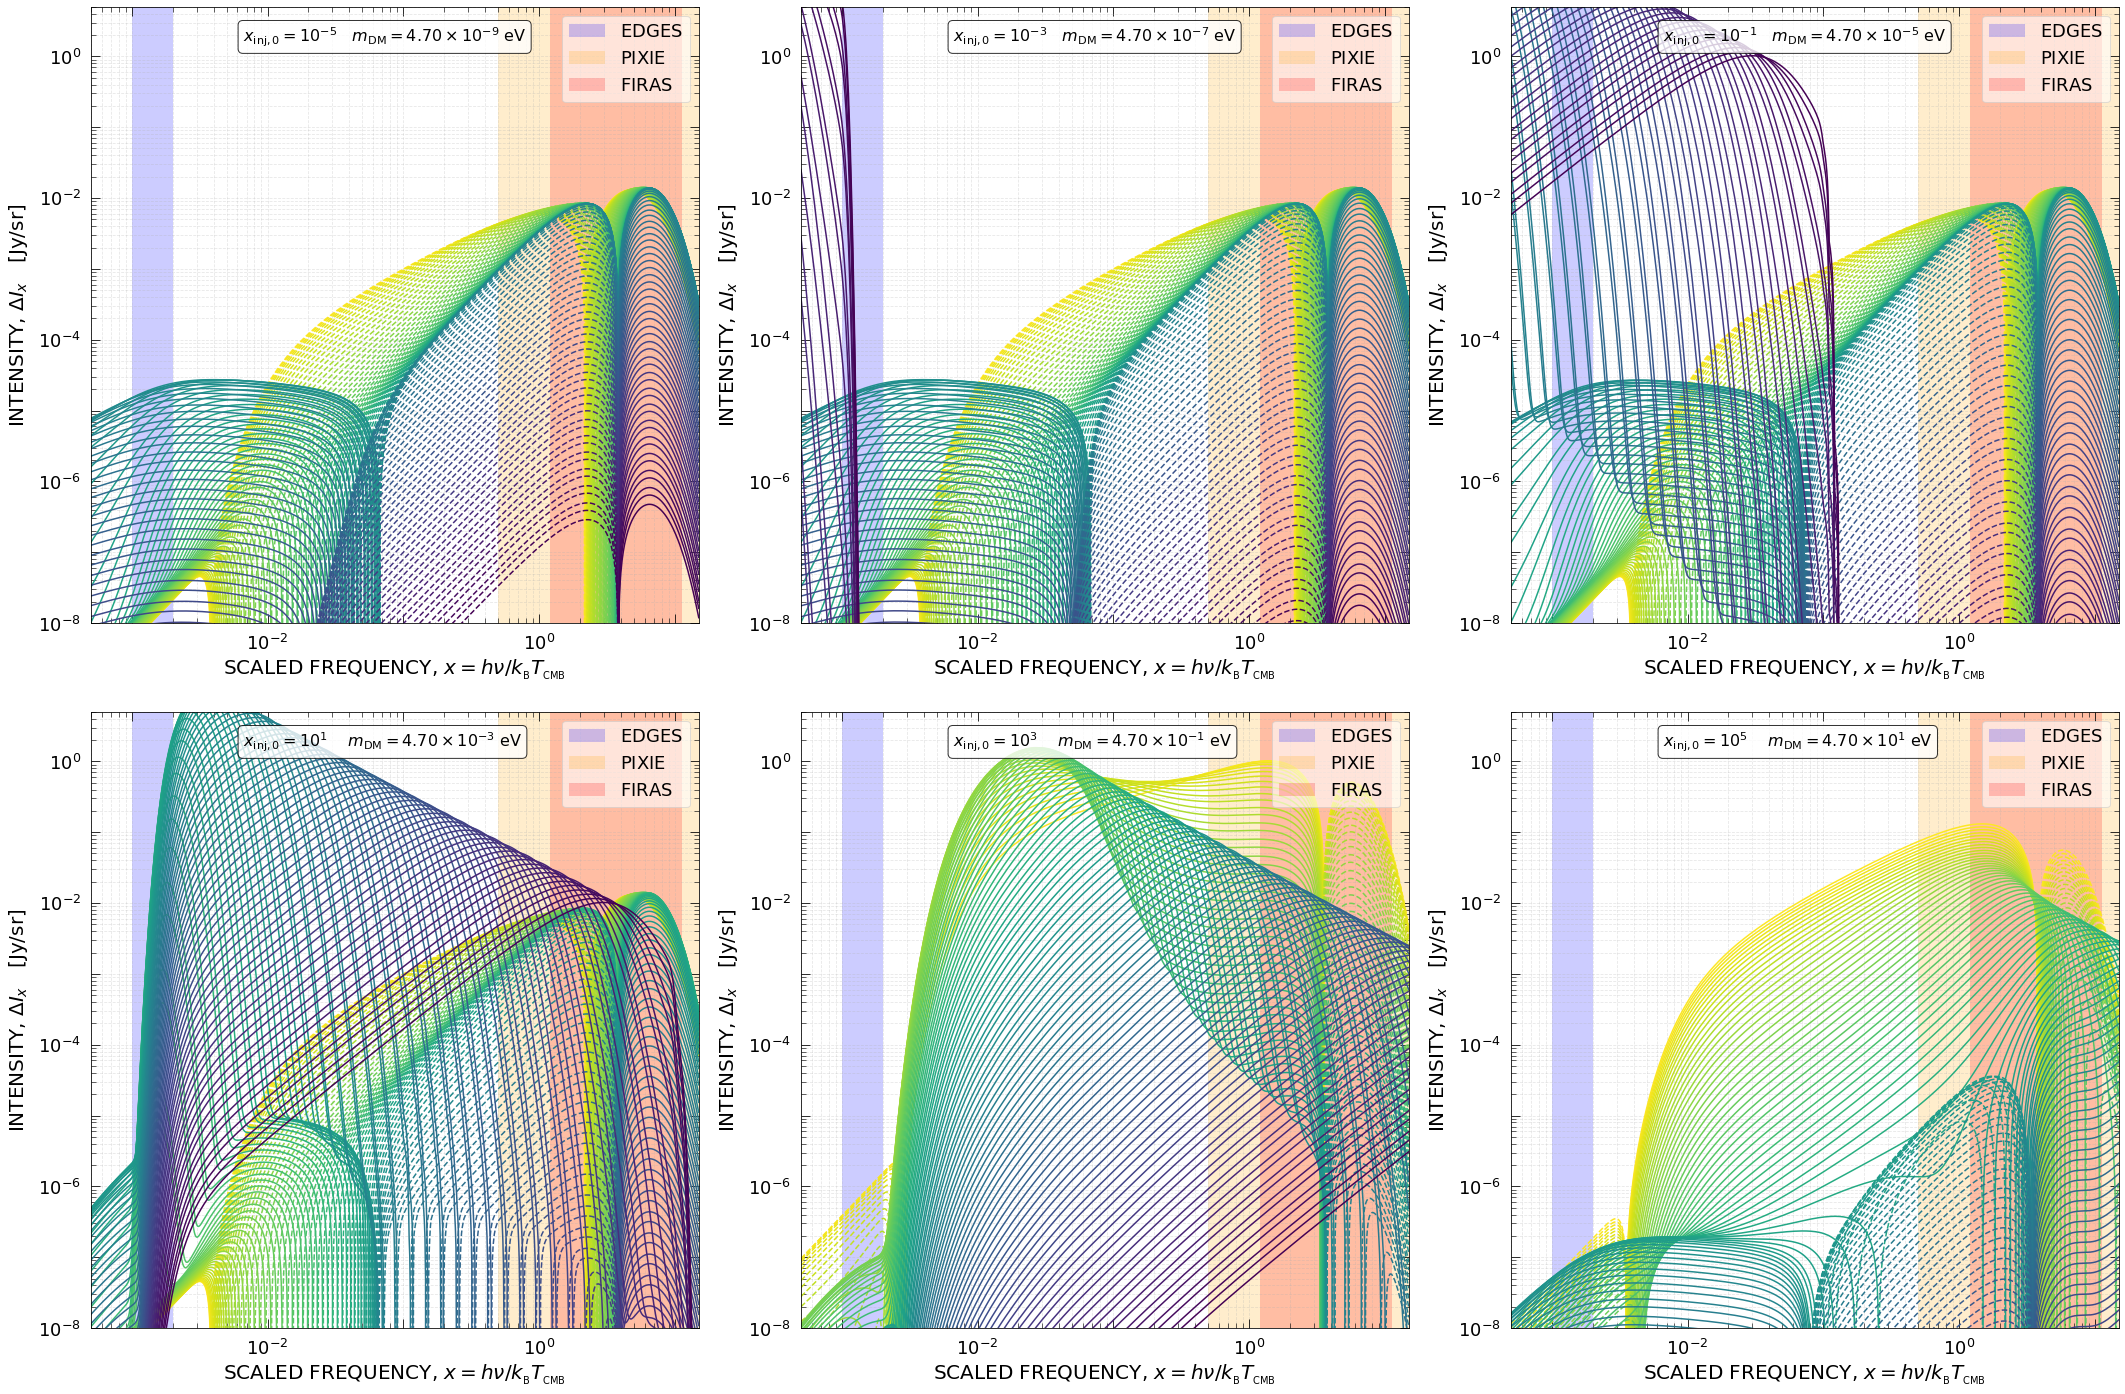

In [39]:
# Gamma_inj_min = 1e-17
# Gamma_inj_max = 1e-8
# N_Gamma_inj = 50
# Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)

xinj_asked_array = [1.e-5,1e-3,1e-1,1e1,1e3,1e5]

# x_min = 1.e-6
# x_max = 1.5e4
# ymin = 1.e-18
# ymax = 1.5e-3
x_min = 5.e-4
x_max = 15.
ymin = 1.e-14*1e6
ymax = 5e-6*1e6

ngamma = 100


fig, ax_array = plt.subplots(2,3,figsize=(30,20))
label_size = 18
title_size = 20
legend_size = 25
handle_length = 1.5

print(ax_array)
for (xinj_asked,ax) in zip(xinj_asked_array,ax_array.reshape(-1)):



    ax.set_xlim(x_min,x_max)
    ax.set_ylim(ymin,ymax)
    ax.set_xscale('log')
    ax.set_yscale('log')


    ax.set_xlabel(label_scaled_frequency,size=title_size)
    ax.set_ylabel(label_intensity,size=title_size)
    ax.yaxis.set_label_coords(-.1,0.5)


#     ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
#     ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

#     plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
#     plt.setp(ax.get_xticklabels(), fontsize=label_size)
#     plt.tick_params(axis='both', which='major', labelsize=label_size,length=9,direction='in')
#     plt.tick_params(axis='both', which='minor', labelsize=label_size,length=5,direction='in')
#     majors = [0, 1, 5]
# #     majors = [0, 1, 5]
#    ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
#     for label in ax.xaxis.get_ticklabels()[::2]:
#         label.set_visible(False) #(3)


#     ax.xaxis.set_ticks_position('both')
#     ax.yaxis.set_ticks_position('both')

#     ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
#     ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
#     locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
#                                           numticks=12)
#     ax.xaxis.set_minor_locator(locmin)
#     ax.yaxis.set_minor_locator(locmin)
#     ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
#     ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

    ax.axvspan(1.e-3, 2e-3, facecolor='blue', alpha=0.2,label=r'$\mathrm{EDGES}$')
    ax.axvspan(0.5, 105, facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2, 11.2, facecolor='red', alpha=0.2,label=r'$\mathrm{FIRAS}$')
    #ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
    #ax.grid(  which="both", alpha=0.3, linestyle='--')


    
    color=iter(cm.viridis(np.linspace(1,0,ngamma)))

    x_asked = np.logspace(np.log10(x_min),np.log10(x_max),1000)
    
    
    m_dec_in_ev = xinj_to_mass*xinj_asked
    str_m_dec_in_ev =  str("%.3e"%m_dec_in_ev)
    text_mdec = r'$m_\mathrm{DM}=$'+scientific_notation(m_dec_in_ev)+r'$\,\,\mathrm{eV}$'

    
    xinj_ct_for_plot = xinj_asked
    


    for Gamma_asked in np.logspace(-16.99,-8.1,ngamma)[::-1]:

        S = pi.GetSpectra(Gamma_asked,xinj_asked,x_asked,sd_lib_bare)
        col = next(color)
#         ax.plot(S["x"],S["DI"]/S["finj"],c=col)
#         ax.plot(S["x"],-S["DI"]/S["finj"],c=col,ls='--')
        ax.plot(S["x"],S["DI"],c=col)
        ax.plot(S["x"],-S["DI"],c=col,ls='--')
        #ax.plot(S["x"],np.abs(S["DI"]),c=next(color))


    ax.loglog()

    text_gamma_str1 = r'$x_\mathrm{inj,0}= $'  + scientific_notation(xinj_asked)
    text_gamma_str = '\t'.join((text_gamma_str1,text_mdec))


    ax.text(0.25, 0.97, text_gamma_str, transform=ax.transAxes, fontsize=16, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    
#     Y = pi.GetYSpecDistAtTandX(pi.firas.firas_y_1996_95_cl,pi.firas_T0_bf,x_asked)
#     ax.plot(x_asked,Y,c='r',alpha = 0.2,label = label_y_firas)
#     ax.plot(x_asked,-Y,c='r',ls='--',alpha = 0.2)

#     MU_chluba = pi.GetMuSpecDistAtTandX_chluba(pi.firas.firas_mu_1996_95_cl,pi.firas_T0_bf,x_asked)
#     ax.plot(x_asked,MU_chluba,c='magenta',alpha = 0.2,label=label_mu_firas)
#     ax.plot(x_asked,-MU_chluba,c='magenta',ls='--',alpha = 0.2)
    
    legend1 = ax.legend(loc=1,ncol=1,frameon=True,framealpha=0.6,fontsize = 18)
# my_cmap = cm.viridis
# sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0., vmax=1.))

# # cbar = plt.colorbar(sm,ax=ax,ticks=[0.,0.5,1.])#,orientation='horizontal',anchor=(0.,0.),shrink=0.5)
# # cbar.ax.set_yticklabels(['0','1','2'])
# #cbar.set_label(r'$\Gamma_\mathrm{inj}$', rotation=0)
# cbar= fig.colorbar(sm, ax=ax_array.flat,orientation='horizontal')
# cbar.ax.set_xticks([0.,0.5,1.])
# cbar.ax.set_xticklabels(['0','1','2'])
# cbar.set_label(r'$\Gamma_\mathrm{inj}$', rotation=0)

    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(False) #(3)
        
    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False) #(3)
        

        
    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
#     plt.tick_params(axis='both', which='major', labelsize=label_size,length=9,direction='in')
#     plt.tick_params(axis='both', which='minor', labelsize=label_size,length=5,direction='in')
fig.tight_layout(pad=3.0)
str_x = str("%.3e"%xinj_ct_for_plot)
plt.savefig(path_to_figures + '/spectra_for_paper_xinj_bare.pdf')
plt.show()
plt.close(fig)



[[<matplotlib.axes._subplots.AxesSubplot object at 0x182036e050>


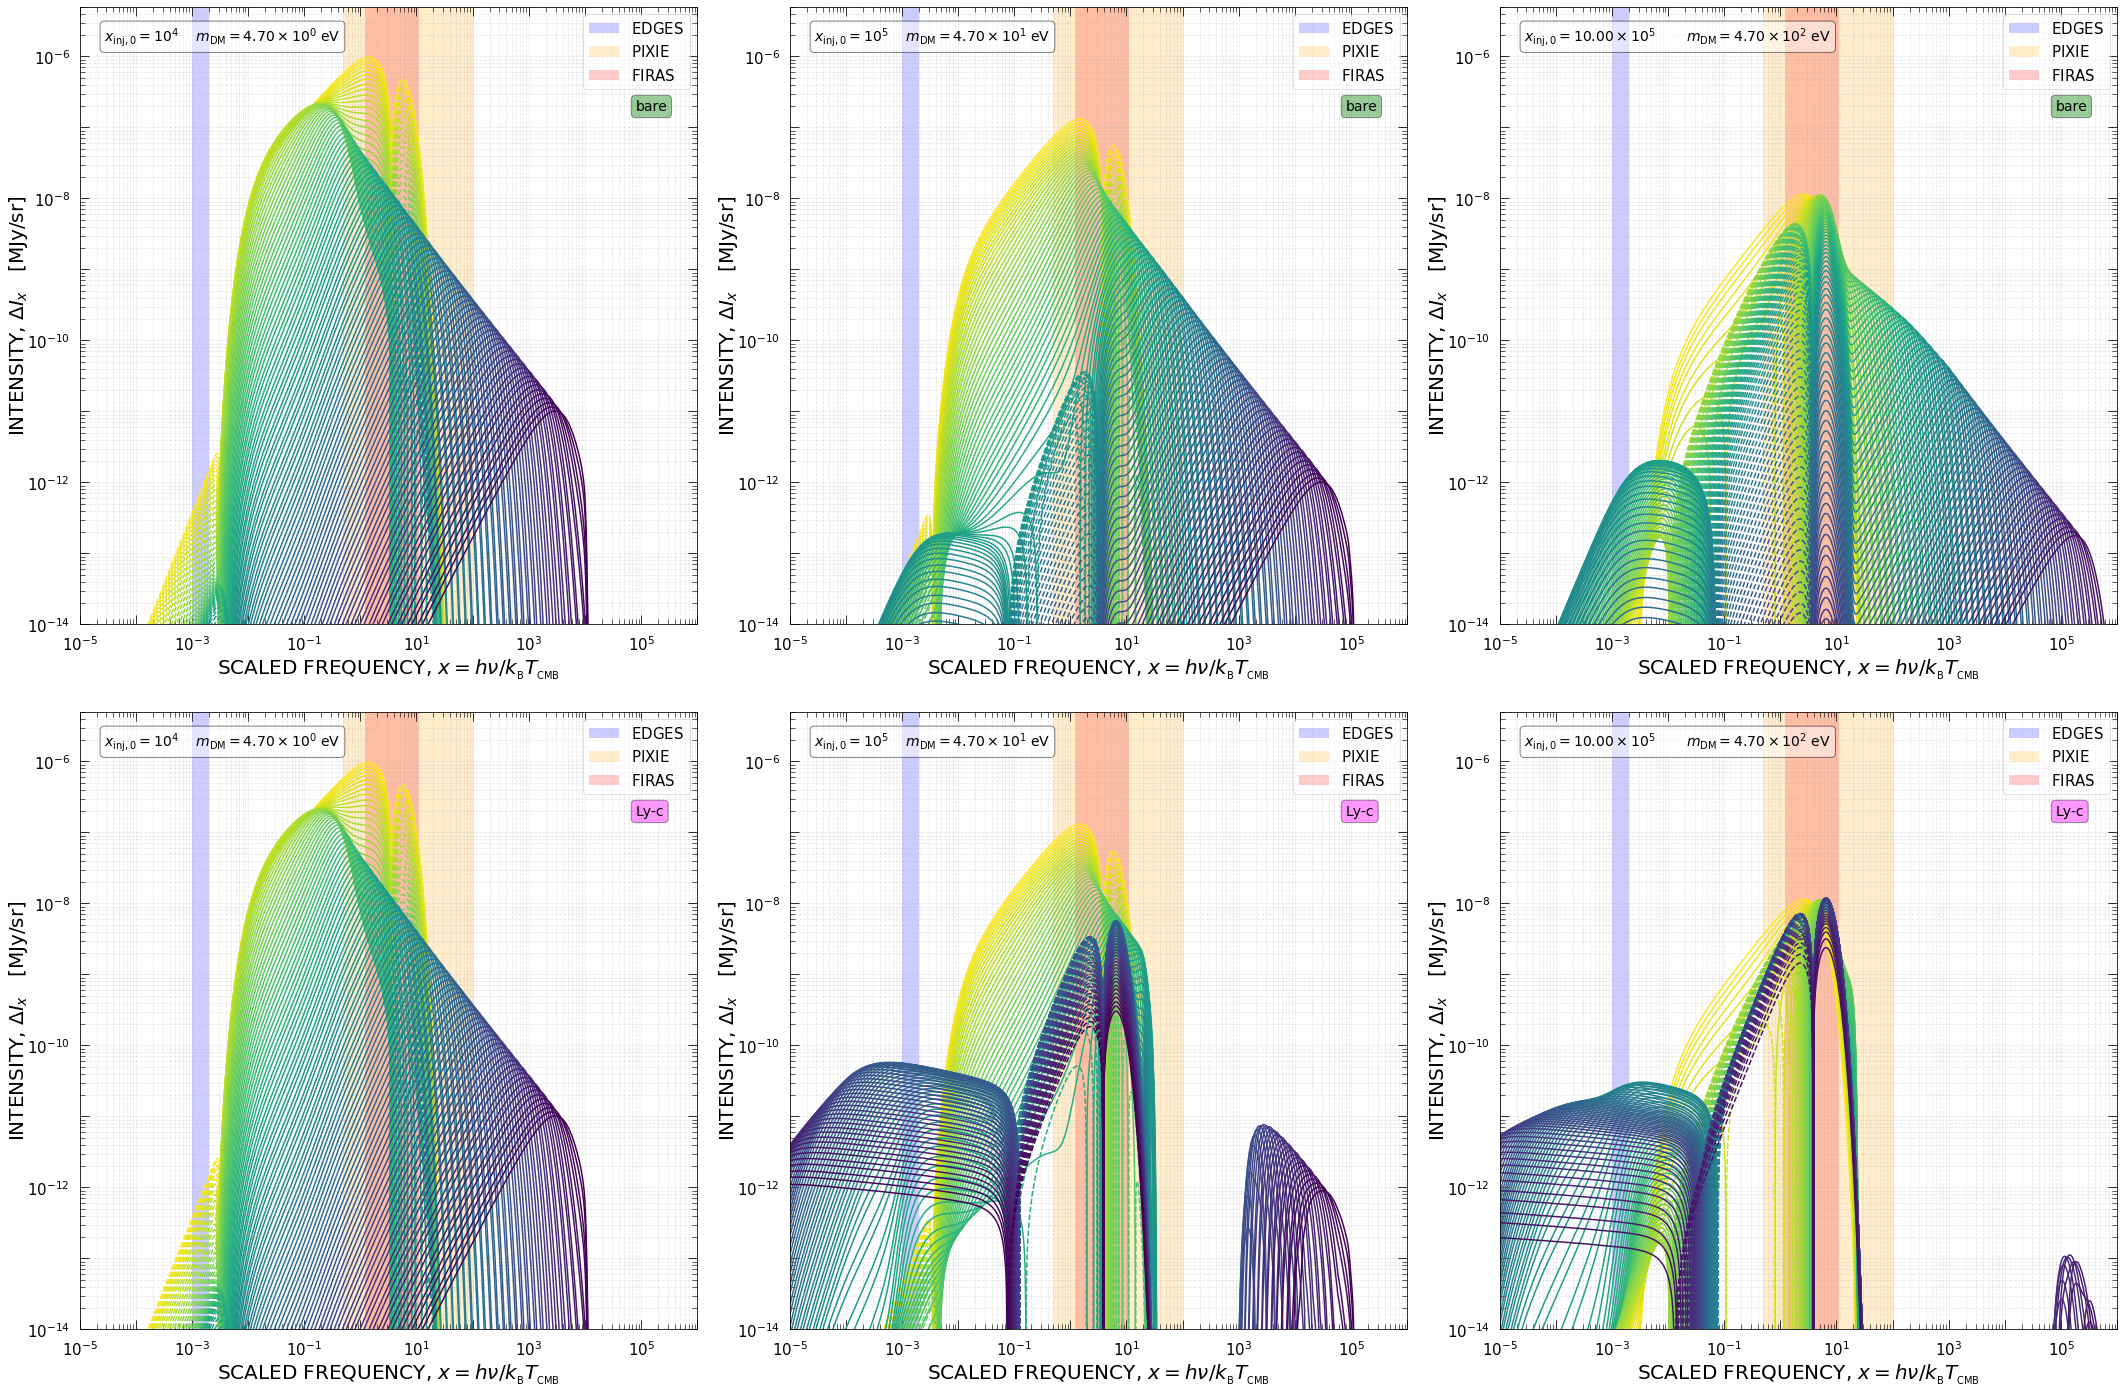

In [68]:
# Gamma_inj_min = 1e-17
# Gamma_inj_max = 1e-8
# N_Gamma_inj = 50
# Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)
xinj_to_mass = 4.698e-4 #in ev
xinj_asked_array = [1.e4,1e5,0.9999e6,1.e4,1e5,0.9999e6]

x_min = 1.e-5
x_max = 1.e6
ymin = 1.e-14
ymax = 5e-6

ngamma = 100


fig, ax_array = plt.subplots(2,3,figsize=(30,20))
label_size = 15
title_size = 20
legend_size = 25
handle_length = 1.5

print(ax_array)
for (xinj_asked,ax,iax) in zip(xinj_asked_array,ax_array.reshape(-1),np.arange(6)):
    if iax in (0,1,2):
        sd_lib = sd_lib_bare
        color=iter(cm.viridis(np.linspace(1,0,ngamma)))
        case_type = 'bare'
        case_color ='green'
    else:
        sd_lib = sd_lib_lyc
        color=iter(cm.viridis(np.linspace(1,0,ngamma)))
        case_type = 'Ly-c'
        case_color ='magenta'



    ax.set_xlim(x_min,x_max)
    ax.set_ylim(ymin,ymax)
    ax.set_xscale('log')
    ax.set_yscale('log')

    
    ax.set_xlabel(label_scaled_frequency,size=title_size)
    ax.set_ylabel(label_intensity,size=title_size)
    ax.yaxis.set_label_coords(-.08,0.5)


        
    ax.axvspan(1.e-3, 2e-3, facecolor='blue', alpha=0.2,label=r'$\mathrm{EDGES}$')
    ax.axvspan(0.5, 105, facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
    ax.axvspan(1.2, 11.2, facecolor='red', alpha=0.2,label=r'$\mathrm{FIRAS}$')
    
    #ax.grid(  which="both", alpha=0.3, linestyle='--')


    
    

    x_asked = np.logspace(np.log10(x_min),np.log10(x_max),1000)
    
    
    m_dec_in_ev = xinj_to_mass*xinj_asked
    text_mdec = r'$m_\mathrm{DM}=$'+scientific_notation(m_dec_in_ev)+r'$\,\,\mathrm{eV}$'
    
    xinj_ct_for_plot = xinj_asked
    


    for Gamma_asked in np.logspace(-16.99,-8.1,ngamma)[::-1]:

        S = pi.GetSpectra(Gamma_asked,xinj_asked,x_asked,sd_lib)
        col = next(color)
#         ax.plot(S["x"],S["DI"]/S["finj"],c=col)
#         ax.plot(S["x"],-S["DI"]/S["finj"],c=col,ls='--')
        ax.plot(S["x"],S["DI"],c=col)
        ax.plot(S["x"],-S["DI"],c=col,ls='--')
        #ax.plot(S["x"],np.abs(S["DI"]),c=next(color))


    ax.loglog()
    text_gamma_str1 = r'$x_\mathrm{inj,0}= $'  + scientific_notation(xinj_asked)
    text_gamma_str = '\t'.join((text_gamma_str1,text_mdec))


    ax.text(0.04, 0.97, text_gamma_str, transform=ax.transAxes, fontsize=14, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    
    ax.text(0.9, 0.85, case_type, transform=ax.transAxes, fontsize=14, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor=case_color, alpha=0.4))

    
#     Y = pi.GetYSpecDistAtTandX(pi.firas.firas_y_1996_95_cl,pi.firas_T0_bf,x_asked)
#     ax.plot(x_asked,Y,c='r',alpha = 0.2,label = label_y_firas)
#     ax.plot(x_asked,-Y,c='r',ls='--',alpha = 0.2)

#     MU_chluba = pi.GetMuSpecDistAtTandX_chluba(pi.firas.firas_mu_1996_95_cl,pi.firas_T0_bf,x_asked)
#     ax.plot(x_asked,MU_chluba,c='magenta',alpha = 0.2,label=label_mu_firas)
#     ax.plot(x_asked,-MU_chluba,c='magenta',ls='--',alpha = 0.2)
    
    legend1 = ax.legend(loc=1,ncol=1,frameon=True,framealpha=0.6,fontsize = 15)
# my_cmap = cm.viridis
# sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0., vmax=1.))

# # cbar = plt.colorbar(sm,ax=ax,ticks=[0.,0.5,1.])#,orientation='horizontal',anchor=(0.,0.),shrink=0.5)
# # cbar.ax.set_yticklabels(['0','1','2'])
# #cbar.set_label(r'$\Gamma_\mathrm{inj}$', rotation=0)
# cbar= fig.colorbar(sm, ax=ax_array.flat,orientation='horizontal')
# cbar.ax.set_xticks([0.,0.5,1.])
# cbar.ax.set_xticklabels(['0','1','2'])
# cbar.set_label(r'$\Gamma_\mathrm{inj}$', rotation=0)
    ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(False) #(3)
        
    ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
    ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
    ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
    ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

    # manipulate x-axis ticks and labels
    ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
    ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
    for label in ax.xaxis.get_ticklabels()[::2]:
        label.set_visible(False) #(3)
    ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

fig.tight_layout(pad=3.0)
str_x = str("%.3e"%xinj_ct_for_plot)
plt.savefig(path_to_figures + '/spectra_for_paper_xinj_bare_vs_lyc.pdf')
plt.show()
plt.close(fig)

In [2]:
Gamma_inj_min = 1e-18
Gamma_inj_max = 1e-8
N_Gamma_inj = 3
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)

xinj_min = 1e-6
xinj_max = 1e6
N_xinj = 3
xinj_values = np.logspace(np.log10(xinj_min),np.log10(xinj_max),N_xinj)

xinj_values = [1e-4]

p_array = xinj_values
p_name = 'photon injection x_dec'

args = {}
args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_spectra'] = 'no'

ct = pi.cosmotherm()
ct.save_dir_name = 'case_' + str(1)

ct.ct_zend = 1e5
ct.ct_Drho_rho_dec = 1e-100
ct.ct_reionisation_model = 2
ct.ct_evolve_Xe = 1
ct.ct_pi_redshift_evolution_mode=0
R = ct.run_cosmotherm_parallel(**args)


In [2]:


p_array = 1.e-4
p_name = 'photon injection x_dec'

args = {}
args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_spectra'] = 'no'

ct = pi.cosmotherm()
ct.ct_pi_redshift_evolution_mode=0
ct.ct_Drho_rho_dec = 1e-100


ct.ct_reionisation_model = 1
R_reio_poulin = ct.run_cosmotherm_parallel(**args)


ct.ct_reionisation_model = 2
R_reio_chluba = ct.run_cosmotherm_parallel(**args)


ct.ct_reionisation_model = 0
R_hubble = ct.run_cosmotherm_parallel(**args)




In [3]:
ct.ct_zend 

0.01

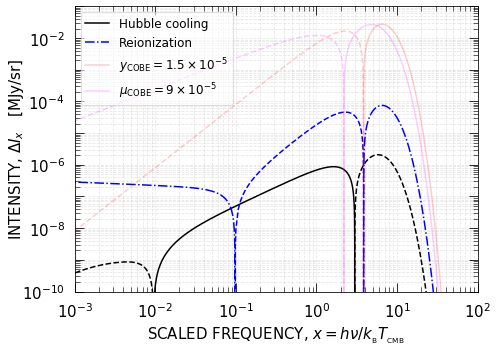

In [76]:
y_dist = pi.GetYSpecDistAtTandX(pi.firas.firas_y_1996_95_cl,2.726,R_hubble[0]['x'])
mu_dist = pi.GetMuSpecDistAtTandX_chluba(pi.firas.firas_mu_1996_95_cl,2.726,R_hubble[0]['x'])

fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 15
title_size = 15
legend_size = 25
handle_length = 1.5


x_min = 1e-3
x_max = 1e2

ymin = 1e-10
ymax = 1e-1

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_intensity,size=title_size)
ax.set_xlabel(label_scaled_frequency,size=title_size)
ax.yaxis.set_label_coords(-.12,0.5)


# ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
# ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

# plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
# plt.setp(ax.get_xticklabels(), fontsize=label_size)

# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')

# #ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
# ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
# locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
#                                       numticks=12)
# ax.xaxis.set_minor_locator(locmin)
# # ax.yaxis.set_minor_locator(locmin)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# # ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# ax.grid( b=True, which="both", alpha=0.3, linestyle='--')



ax.plot(R_hubble[0]['x'],1e-6*R_hubble[0]['DI'],c='k',label='Hubble cooling')
ax.plot(R_hubble[0]['x'],-1e-6*R_hubble[0]['DI'],c='k',ls='--')

ax.plot(R_reio_poulin[0]['x'],1e-6*R_reio_poulin[0]['DI'],c='b',ls='-.',label='Reionization')
ax.plot(R_reio_poulin[0]['x'],-1e-6*R_reio_poulin[0]['DI'],c='b',ls='--')

# ax.plot(R_reio_chluba[0]['x'],1e-6*R_reio_chluba[0]['DI'],c='k',label='reio chluba')
# ax.plot(R_reio_chluba[0]['x'],-1e-6*R_reio_chluba[0]['DI'],c='k',ls='--')



ax.plot(R_reio_chluba[0]['x'],y_dist,c='r',alpha = 0.2,label=label_y_firas)
ax.plot(R_reio_chluba[0]['x'],-y_dist,c='r',alpha = 0.2,ls='--')


ax.plot(R_reio_chluba[0]['x'],mu_dist,c='magenta',alpha = 0.2,label=label_mu_firas)
ax.plot(R_reio_chluba[0]['x'],-mu_dist,c='magenta',alpha = 0.2,ls='--')
# m_dec_in_ev = xinj_to_mass*xinj_asked
# text_mdec = r'$m_\mathrm{DM}=$' + scientific_notation(m_dec_in_ev) + r'$\,\,\mathrm{eV}$'


# text_gamma_str1 = r'$x_\mathrm{inj,0}= $' + scientific_notation(xinj_asked)

# text_gamma_str = '\t'.join((text_gamma_str1,text_mdec))


# ax.text(0.04, 0.55, text_gamma_str, transform=ax.transAxes, fontsize=8, verticalalignment='top',
#       bbox=dict(boxstyle='round', facecolor='grey', alpha=0.1))

ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
# for label in ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False) #(3)
ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

# plt.ylim(-2.,5)
#plt.xlim(1e-3,13)

ax.legend(loc=2,ncol=1,frameon=True,framealpha=0.6,fontsize = 12)

fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_std_dist.pdf')
plt.show()
plt.close(fig)

In [ ]:
Gamma_inj_min = 1e-18
Gamma_inj_max = 1e-8
N_Gamma_inj = 30
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)



ngamma = N_Gamma_inj 
args = {}
args['param_values_array'] = Gamma_values
args['param_name'] = 'photon injection Gamma_dec'

ct = pi.cosmotherm()
ct.ct_pi_redshift_evolution_mode=1
R = ct.run_cosmotherm_parallel(**args)

gamma = []
fdm =[]
fdm_improved = {}
fdm_improved['mu'] = []
fdm_improved['y'] = []
fdm_improved['tot'] = []
X_dm = pi.dm_particle()
Drho_rho_tot = pi.firas.firas_Drho_rho_1996_95_cl
Drho_rho_tot = ct.ct_Drho_rho_dec
cosmo = pi.cosmo()
pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
for r,Gamma_asked in zip(R,Gamma_values):
    gamma.append(r['Gamma'])
    fdm.append(r['barI*Gamma_70/h70']**-1.*ct.ct_Drho_rho_dec*2.0593e-4*(cosmo.omega_cdm/0.12)**-1.)
    ct.ct_Gamma_dec = Gamma_asked
    pi.set_dm_params_to_CT_pi_params(X_dm,ct)
    r = pi.get_fdm_from_Drho_rho(Drho_rho_tot,cosmo,ct,X_dm)
    fdm_improved['mu'].append(r['mu'])
    fdm_improved['y'].append(r['y'])
    fdm_improved['tot'].append(r['tot'])

In [17]:
ct = pi.cosmotherm()
cosmo = pi.cosmo()
X_dm = pi.dm_particle()

pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
pi.set_dm_params_to_CT_pi_params(X_dm,ct)
greens = {}
greens['Gamma_inj'] = []
greens['curves'] = []
for gamma in [1e-9,1e-11,1e-13,1e-15]:
    X_dm.Gamma_inj =gamma
    X_dm.f_dm = pi.get_fdm_from_Drho_rho(ct.ct_Drho_rho_dec,cosmo,ct,X_dm)['tot']
    a_dict = {}
    a_dict['cosmotherm']=ct
    a_dict['dm_particle']=X_dm
    X = np.logspace(-1,1,100)
    DI = pi.greens_functions_DI_from_energy_release_history_in_MJy_per_sr(X,pi.pi_energy_release_history_dlnrho_dt,cosmo,**a_dict)
    green_approx = {}
    green_approx['X'] = X
    green_approx['DI'] = DI[0]
    
    greens['Gamma_inj'].append(gamma)
    greens['curves'].append(green_approx)

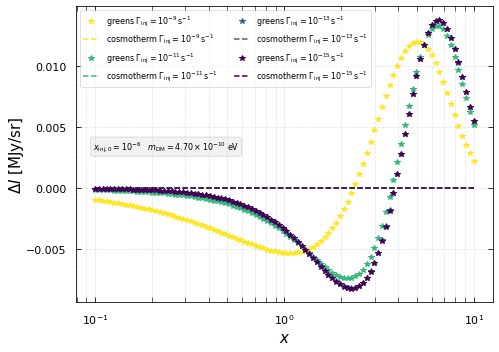

In [20]:

#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 11
title_size = 15
legend_size = 25
handle_length = 1.5




# ax.set_xlim(x_min,x_max)
# ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('linear')


ax.set_ylabel(label_intensity,size=title_size)
ax.set_xlabel(label_scaled_frequency,size=title_size)
ax.yaxis.set_label_coords(-.12,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
# ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

# ax.plot(xi_array,mu_over_DN_N/xi_array,c='k',label='instantaneous injection')
# plt.ylim(-3.,0.5)
# ax.plot(x_axis,y_axis,c='k',label='greens function estimate')
# # ax.plot(x_axis,-y_axis,c='k',ls='--')
ngammas = len(greens['Gamma_inj'])
color=iter(cm.viridis(np.linspace(1,0,ngammas)))

i = 0
for gamma in greens['Gamma_inj']:
    col = next(color)
    ax.plot(greens['curves'][i]['X'],greens['curves'][i]['DI'],ls='none',c=col,marker='*',label='greens ' + r'$\Gamma_\mathrm{inj}=$'+scientific_notation(gamma) + r'$\,\mathrm{s}^{-1}$')
    #ax.plot(greens['curves'][i]['X'],-np.asarray(greens['curves'][i]['DI']),c=col,ls='--')
    
    xinj_asked = 1e-6
    S = pi.GetSpectra(gamma,xinj_asked,greens['curves'][i]['X'],sd_lib_bare)
    ax.plot(S["x"],S["DI"]*1e-6,c=col,ls='--',label='cosmotherm ' + r'$\Gamma_\mathrm{inj}=$'+scientific_notation(gamma) + r'$\,\mathrm{s}^{-1}$')
    #plt.plot(S["x"],-S["DI"],c=col,ls='--')
    i+=1


m_dec_in_ev = xinj_to_mass*xinj_asked
text_mdec = r'$m_\mathrm{DM}=$' + scientific_notation(m_dec_in_ev) + r'$\,\,\mathrm{eV}$'


text_gamma_str1 = r'$x_\mathrm{inj,0}= $' + scientific_notation(xinj_asked)

text_gamma_str = '\t'.join((text_gamma_str1,text_mdec))


ax.text(0.04, 0.55, text_gamma_str, transform=ax.transAxes, fontsize=8, verticalalignment='top',
      bbox=dict(boxstyle='round', facecolor='grey', alpha=0.1))



# plt.ylim(-2.,5)
#plt.xlim(1e-3,13)

ax.legend(loc=2,ncol=2,frameon=True,framealpha=0.6,fontsize = 8)

fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_greens.pdf')
plt.show()
plt.close(fig)

In [4]:
ct = pi.cosmotherm()
cosmo = pi.cosmo()
X_dm = pi.dm_particle()

pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
pi.set_dm_params_to_CT_pi_params(X_dm,ct)

X_dm.Gamma_inj =1e-17
X_dm.f_dm = pi.get_fdm_from_Drho_rho(ct.ct_Drho_rho_dec,cosmo,ct,X_dm)['tot']
a_dict = {}
a_dict['cosmotherm']=ct
a_dict['dm_particle']=X_dm
X = np.logspace(-1,1,20)
DI = pi.greens_functions_DI_from_energy_release_history_in_MJy_per_sr(X,pi.pi_energy_release_history_dlnrho_dt,cosmo,**a_dict)
green_approx = {}
green_approx['X'] = X
green_approx['DI'] = DI[0]

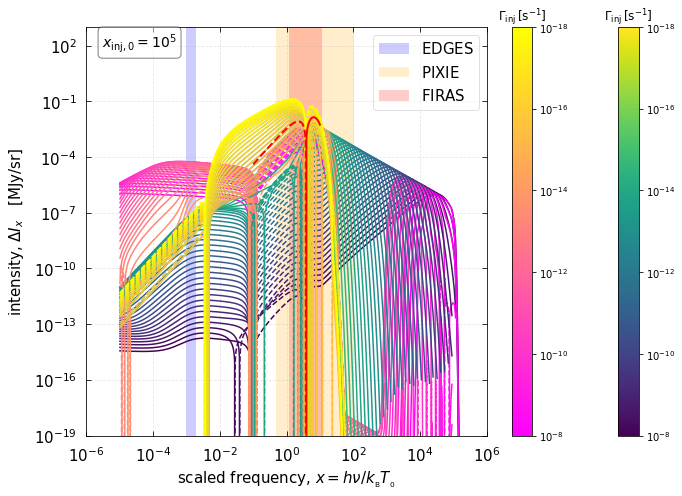

In [30]:
#path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/run_scripts_photon_injection_paper/figures/"
# Gamma_inj_min = 1e-17
# Gamma_inj_max = 1e-8
# N_Gamma_inj = 50
# Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)

xinj_asked = 1.e5

x_min = 1.e-6
x_max = 1.e6
ymin = 1.e-19
ymax = 1e3

fig, ax1 = plt.subplots(1,1,figsize=(10,7))
label_size = 15
title_size = 15
legend_size = 25
handle_length = 1.5


# my_cmap = cm.viridis
# sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=1))

# my_cmap_2 = cm.spring
# sm2 = plt.cm.ScalarMappable(cmap=my_cmap_2, norm=plt.Normalize(vmin=0, vmax=1))



ax =ax1


ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(label_scaled_frequency,size=title_size)
ax.set_ylabel(label_intensity,size=title_size)
ax.yaxis.set_label_coords(-.15,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=100))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=100))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10)*0.1,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.axvspan(1.e-3, 2e-3, facecolor='blue', alpha=0.2,label=r'$\mathrm{EDGES}$')
ax.axvspan(0.5, 105, facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
ax.axvspan(1.2, 11.2, facecolor='red', alpha=0.2,label=r'$\mathrm{FIRAS}$')





x_asked = np.logspace(np.log10(x_min),np.log10(x_max),1000)




xinj_ct_for_plot = xinj_asked
    
# Y = pi.GetYSpecDistAtTandX(pi.firas.firas_y_1996_95_cl,pi.firas_T0_bf,x_asked)
# plt.plot(x_asked,Y,c='r')
# plt.plot(x_asked,-Y,c='r',ls='--')

# # MU = pi.GetMuSpecDistAtTandX(pi.firas.firas_mu_1996_95_cl,pi.firas_T0_bf,x_asked)
# # plt.plot(x_asked,MU,c='magenta')
# # plt.plot(x_asked,-MU,c='magenta',ls='--')

# MU_chluba = pi.GetMuSpecDistAtTandX_chluba(pi.firas.firas_mu_1996_95_cl,pi.firas_T0_bf,x_asked)
# plt.plot(x_asked,MU_chluba,c='purple')
# plt.plot(x_asked,-MU_chluba,c='purple',ls='--')

xs = []
ys = []
ngamma = 50
gammas = np.logspace(-16.99,-8.1,ngamma)
cb = cm.viridis(np.linspace(0,1,ngamma))
color=iter(cm.viridis(np.linspace(0,1,ngamma)))
color_2=iter(cm.spring(np.linspace(0,1,ngamma)))
# gammas=[1e-16]
for Gamma_asked in gammas:
    col = next(color)
    S = pi.GetSpectra(Gamma_asked,xinj_asked,x_asked,sd_lib_bare)
    plt.plot(S["x"],S["DI"],c=col)
    plt.plot(S["x"],-S["DI"],c=col,ls='--')
    
    col = next(color_2)
    S = pi.GetSpectra(Gamma_asked,xinj_asked,x_asked,sd_lib_lyc)
    plt.plot(S["x"],S["DI"],c=col)
    plt.plot(S["x"],-S["DI"],c=col,ls='--')

ax.plot(green_approx['X'],green_approx['DI'],lw=2,c='r')
ax.plot(green_approx['X'],-green_approx['DI'],lw=2,c='r',ls='--')


my_cmap = cm.viridis
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm)
cbar.set_ticks([0.,0.2,0.4,0.6,0.8,1.])
cbar.ax.set_yticklabels([r'$10^{-8}$',r'$10^{-10}$',r'$10^{-12}$',r'$10^{-14}$',r'$10^{-16}$',r'$10^{-18}$'])
cbar.ax.set_title(r'$\Gamma_\mathrm{inj}\,[\mathrm{s}^{-1}]$')

my_cmap = cm.spring
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm)
cbar.set_ticks([0.,0.2,0.4,0.6,0.8,1.])
cbar.ax.set_yticklabels([r'$10^{-8}$',r'$10^{-10}$',r'$10^{-12}$',r'$10^{-14}$',r'$10^{-16}$',r'$10^{-18}$'])
cbar.ax.set_title(r'$\Gamma_\mathrm{inj}\,[\mathrm{s}^{-1}]$')



plt.loglog()



ax.text(0.04, 0.99, r'$x_\mathrm{inj,0}= $'+scientific_notation(xinj_asked), transform=ax.transAxes, fontsize=14, verticalalignment='top',bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

legend1 = ax1.legend(loc=1,ncol=1,frameon=True,framealpha=0.6,fontsize = 15)
plt.grid( b=True, which="both", alpha=0.3, linestyle='--')
fig.tight_layout()
str_x = str("%.3e"%xinj_ct_for_plot)
plt.savefig(path_to_figures + '/spectra_for_paper_xinj_' + str_x +'.pdf')
plt.show()
#plt.close(fig)

In [17]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [2]:
# ct = pi.cosmotherm()
# cosmo = pi.cosmo()
# X_dm = pi.dm_particle()
# pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
# pi.set_dm_params_to_CT_pi_params(X_dm,ct)

In [2]:
Gamma_inj_min = 1e-18
Gamma_inj_max = 1e-8
N_Gamma_inj = 30
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)



ngamma = N_Gamma_inj 
args = {}
args['param_values_array'] = Gamma_values
args['param_name'] = 'photon injection Gamma_dec'

ct = pi.cosmotherm()
ct.ct_pi_redshift_evolution_mode=1
R = ct.run_cosmotherm_parallel(**args)

gamma = []
fdm =[]
fdm_improved = {}
fdm_improved['mu'] = []
fdm_improved['y'] = []
fdm_improved['tot'] = []
X_dm = pi.dm_particle()
Drho_rho_tot = pi.firas.firas_Drho_rho_1996_95_cl
Drho_rho_tot = ct.ct_Drho_rho_dec
cosmo = pi.cosmo()
pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
for r,Gamma_asked in zip(R,Gamma_values):
    gamma.append(r['Gamma'])
    fdm.append(r['barI*Gamma_70/h70']**-1.*ct.ct_Drho_rho_dec*2.0593e-4*(cosmo.omega_cdm/0.12)**-1.)
    ct.ct_Gamma_dec = Gamma_asked
    pi.set_dm_params_to_CT_pi_params(X_dm,ct)
    r = pi.get_fdm_from_Drho_rho(Drho_rho_tot,cosmo,ct,X_dm)
    fdm_improved['mu'].append(r['mu'])
    fdm_improved['y'].append(r['y'])
    fdm_improved['tot'].append(r['tot'])

[1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
[8.142524706437871e-18, 1.0724985780430303e-16, 3.0438104061872333e-15, 1.1188724799764641e-13, 6.923350722566399e-12, 6.356236493724458e-10, 6.297295247816351e-08]
['$1$', '$10^{-1}$', '$10^{-2}$', '$10^{-3}$', '$10^{-4}$', '$10^{-5}$', '$10^{-6}$']


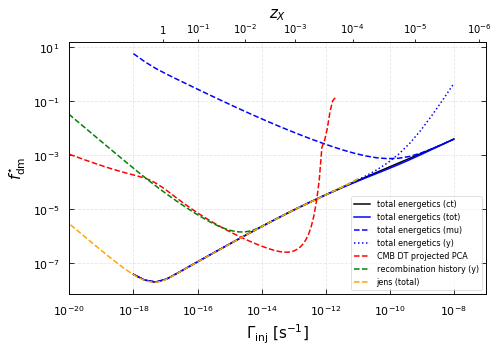

In [32]:

zX = []
gammas_for_zX = []
labels_zX = []
# for Gamma_asked in np.logspace(-9,-23,8):
#     ct.ct_Gamma_dec = Gamma_asked
#     try:
#         zX.append(pi.injection_redshift_zX(ct.ct_Gamma_dec,cosmo,ct))
#         gammas_for_zX.append(Gamma_asked)
#     except:
#         continue
# print(zX)
# print(gammas_for_zX)
for z_asked in np.asarray([1.,1e1,1e2,1e3,1e4,1e5,1e6]):
    try:
        zX.append(z_asked)
        labels_zX.append(scientific_notation(z_asked))
        gammas_for_zX.append(pi.find_Gamma_inj_for_injection_redshift_zX(z_asked,cosmo,ct))
    except:
        continue
print(zX)
print(gammas_for_zX)
print(labels_zX)
# sientific_notation(p_value)


x_min = 1.e-20
x_max = 1.e-7
ymin = 1.e-3
ymax = 2e0

#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 11
title_size = 15
legend_size = 25
handle_length = 1.5




ax.set_xlim(x_min,x_max)
# ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(r'$f_\mathrm{dm}^{\star}$',size=title_size)
ax.set_xlabel(r"$\Gamma_\mathrm{inj}\,\,[\mathrm{s^{-1}}]$",size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=120)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')



color=iter(cm.viridis(np.linspace(1,0,ngamma)))





    
    
ax.plot(gamma,fdm,c='k',label='total energetics (ct)')
ax.plot(gamma,fdm_improved['tot'],c='b',label='total energetics (tot)')
ax.plot(gamma,fdm_improved['mu'],c='b',ls = '--',label='total energetics (mu)')
ax.plot(gamma,fdm_improved['y'],c='b',ls = ':',label='total energetics (y)')



PCA = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/pi_spec/specdist/data/fdm_PCA_limits.dat')
ax.plot(PCA[:,0],2.*PCA[:,1],c='r',ls='--',label='CMB DT projected PCA')
PCA = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/pi_spec/specdist/data/f_dm_total_and_ydist.dat')
ax.plot(PCA[:,0],PCA[:,1],c='green',ls='--',label='recombination history (y)')
ax.plot(PCA[:,0],PCA[:,2],c='orange',ls='--',label='jens (total)')


ax.loglog()
# my_cmap = cm.viridis
# sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=1))
# cbar = plt.colorbar(sm)
# cbar.set_ticks([0.,0.2,0.4,0.6,0.8,1.])
# cbar.ax.set_yticklabels([r'$10^{-8}$',r'$10^{-10}$',r'$10^{-12}$',r'$10^{-14}$',r'$10^{-16}$',r'$10^{-18}$'])
# cbar.ax.set_title(r'$\Gamma_\mathrm{inj}\,[\mathrm{s}^{-1}]$')
ax.legend(loc=4,ncol=1,frameon=True,framealpha=0.6,fontsize = 8)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())

new_tick_locations = np.asarray(gammas_for_zX)

ax2.set_xscale('log')
ax2.set_xticks(gammas_for_zX)
# ax2.set_xticklabels(["%.2e" % z for z in zX])
ax2.set_xticklabels(labels_zX)

ax2.set_xlabel(r"$z_X$",size=title_size)
fig.tight_layout()
plt.savefig(path_to_figures + '/spectra_for_paper_fdm_ct.pdf')
plt.show()
plt.close(fig)
#np.savetxt('fdm_gamma_tot_mu_y.txt',np.c_[gamma,fdm_improved['tot'],fdm_improved['mu'],fdm_improved['y']])

In [35]:
ct = pi.cosmotherm()
cosmo = pi.cosmo()
X_dm = pi.dm_particle()
pi.set_dm_params_to_CT_pi_params(X_dm,ct)
pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
a_dict = {}
a_dict['cosmotherm']=ct
a_dict['dm_particle']=X_dm

zi = 2e6
xi_array = np.logspace(np.log10(1e-7),np.log10(20.),100)
mu_over_DN_N = []
mu_over_DN_N_continuous = []
for xi in xi_array:
    X_dm.x_0 = xi
    mui = pi.mu_instantaneous_injection(zi,cosmo,ct,X_dm)
    mu_over_DN_N.append(mui)
    
    mui_continuous = pi.mu_continuous_injection(cosmo,ct,X_dm)['value']/pi.DN_N_from_entropy_production_history(pi.pi_entropy_production_history_dlnN_dt,cosmo,**a_dict)['value']
    mu_over_DN_N_continuous.append(mui_continuous)

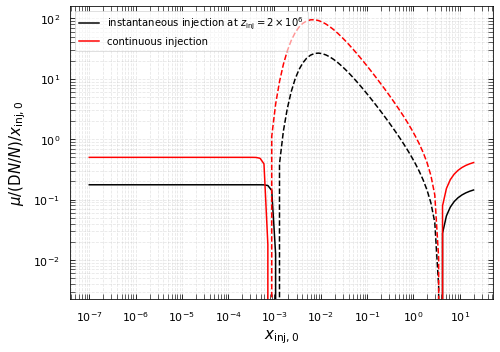

In [42]:
mu_over_DN_N = np.asarray(mu_over_DN_N)
mu_over_DN_N_continuous = np.asarray(mu_over_DN_N_continuous)

#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 11
title_size = 15
legend_size = 25
handle_length = 1.5




# ax.set_xlim(x_min,x_max)
# ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(r'$\mu/(\mathrm{D}N/N)/x_\mathrm{inj,0}$',size=title_size)
ax.set_xlabel(r'$x_\mathrm{inj,0}$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
# ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

# ax.plot(xi_array,mu_over_DN_N/xi_array,c='k',label='instantaneous injection')
# plt.ylim(-3.,0.5)
ax.plot(xi_array,(mu_over_DN_N)/xi_array,c='k',label='instantaneous injection at '+r'$z_\mathrm{inj}=2\times 10^6$')
ax.plot(xi_array,(mu_over_DN_N_continuous)/xi_array,c='r',label='continuous injection')
ax.plot(xi_array,-(mu_over_DN_N)/xi_array,c='k',ls='--')
ax.plot(xi_array,-(mu_over_DN_N_continuous)/xi_array,c='r',ls='--')




# plt.ylim(-2.,5)
#plt.xlim(1e-3,13)

ax.legend(loc=2,ncol=1,frameon=True,framealpha=0.6,fontsize = 10)

fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_mu_int.pdf')
plt.show()
plt.close(fig)

In [27]:

ct = pi.cosmotherm()
cosmo = pi.cosmo()
X_dm = pi.dm_particle()
pi.set_dm_params_to_CT_pi_params(X_dm,ct)
pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
mu_limit = ct.ct_Drho_rho_dec*(3./pi.kappa_c)
f_dm_curves = {}
f_dm_curves['Gamma_inj'] = []
f_dm_curves['curves'] = []
for gamma in [1e-10,1e-8,1e-6,1e-4]:
    X_dm.Gamma_inj = gamma
    a_dict = {}
    a_dict['cosmotherm']=ct
    a_dict['dm_particle']=X_dm

    xi_array = np.logspace(np.log10(1e-5),np.log10(1.e3),50)
    f_dm_curve = {}
    f_dm_curve['x'] = []
    f_dm_curve['fdm'] = []
    for xi in xi_array:
        X_dm.x_0 = xi
        f_dm_curve['x'].append(xi)
        f_dm_curve['fdm'].append(pi.get_fdm_from_mu_continuous_injection(mu_limit,cosmo,ct,X_dm))
    f_dm_curves['Gamma_inj'].append(gamma)
    f_dm_curves['curves'].append(f_dm_curve)

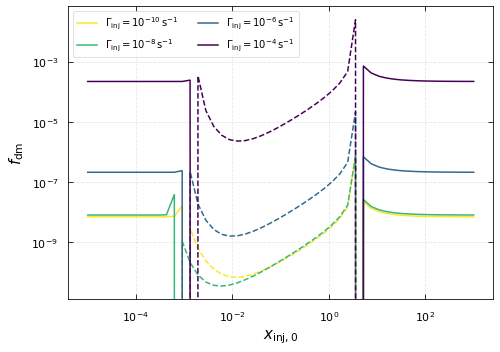

In [29]:

# zX = []
# gammas_for_zX = []
# labels_zX = []
# # for Gamma_asked in np.logspace(-9,-23,8):
# #     ct.ct_Gamma_dec = Gamma_asked
# #     try:
# #         zX.append(pi.injection_redshift_zX(ct.ct_Gamma_dec,cosmo,ct))
# #         gammas_for_zX.append(Gamma_asked)
# #     except:
# #         continue
# # print(zX)
# # print(gammas_for_zX)
# for z_asked in np.asarray([1.,1e1,1e2,1e3,1e4,1e5,1e6]):
#     try:
#         zX.append(z_asked)
#         labels_zX.append(scientific_notation(z_asked))
#         gammas_for_zX.append(pi.find_Gamma_inj_for_injection_redshift_zX(z_asked,cosmo,ct))
#     except:
#         continue
# print(zX)
# print(gammas_for_zX)
# print(labels_zX)
# # sientific_notation(p_value)


x_min = 1.e-20
x_max = 1.e-7
ymin = 1.e-3
ymax = 2e0

#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 11
title_size = 15
legend_size = 25
handle_length = 1.5




# ax.set_xlim(x_min,x_max)
# ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(r'$f_\mathrm{dm}$',size=title_size)
ax.set_xlabel(r"$x_\mathrm{inj,0}$",size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=120)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

ngammas = len(f_dm_curves['Gamma_inj'])
color=iter(cm.viridis(np.linspace(1,0,ngammas)))




i = 0
for gamma in f_dm_curves['Gamma_inj']:
    col = next(color)
    ax.plot(f_dm_curves['curves'][i]['x'],f_dm_curves['curves'][i]['fdm'],c=col,label=r'$\Gamma_\mathrm{inj}=$'+scientific_notation(gamma) + r'$\,\mathrm{s}^{-1}$')
    ax.plot(f_dm_curves['curves'][i]['x'],-np.asarray(f_dm_curves['curves'][i]['fdm']),c=col,ls='--')
    i+=1
    
# ax.plot(gamma,fdm,c='k',label='total energetics (ct)')
# ax.plot(gamma,fdm_improved['tot'],c='b',label='total energetics (tot)')
# ax.plot(gamma,fdm_improved['mu'],c='b',ls = '--',label='total energetics (mu)')
# ax.plot(gamma,fdm_improved['y'],c='b',ls = ':',label='total energetics (y)')



# PCA = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/pi_spec/specdist/data/fdm_PCA_limits.dat')
# ax.plot(PCA[:,0],2.*PCA[:,1],c='r',ls='--',label='CMB DT projected PCA')
# PCA = np.loadtxt('/Users/boris/Work/SPECTRAL-DISTORTIONS/pi_spec/specdist/data/f_dm_total_and_ydist.dat')
# ax.plot(PCA[:,0],PCA[:,1],c='green',ls='--',label='recombination history (y)')
# ax.plot(PCA[:,0],PCA[:,2],c='orange',ls='--',label='jens (total)')


ax.loglog()
# my_cmap = cm.viridis
# sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=1))
# cbar = plt.colorbar(sm)
# cbar.set_ticks([0.,0.2,0.4,0.6,0.8,1.])
# cbar.ax.set_yticklabels([r'$10^{-8}$',r'$10^{-10}$',r'$10^{-12}$',r'$10^{-14}$',r'$10^{-16}$',r'$10^{-18}$'])
# cbar.ax.set_title(r'$\Gamma_\mathrm{inj}\,[\mathrm{s}^{-1}]$')
ax.legend(loc=2,ncol=2,frameon=True,framealpha=0.6,fontsize = 10)

# ax2 = ax.twiny()
# ax2.set_xlim(ax.get_xlim())

# new_tick_locations = np.asarray(gammas_for_zX)

# ax2.set_xscale('log')
# ax2.set_xticks(gammas_for_zX)
# # ax2.set_xticklabels(["%.2e" % z for z in zX])
# ax2.set_xticklabels(labels_zX)

# ax2.set_xlabel(r"$z_X$",size=title_size)
fig.tight_layout()
plt.savefig(path_to_figures + '/spectra_for_paper_fdm_mu.pdf')
plt.show()
plt.close(fig)
#np.savetxt('fdm_gamma_tot_mu_y.txt',np.c_[gamma,fdm_improved['tot'],fdm_improved['mu'],fdm_improved['y']])

In [21]:
len(f_dm_curves['Gamma_inj'])

3

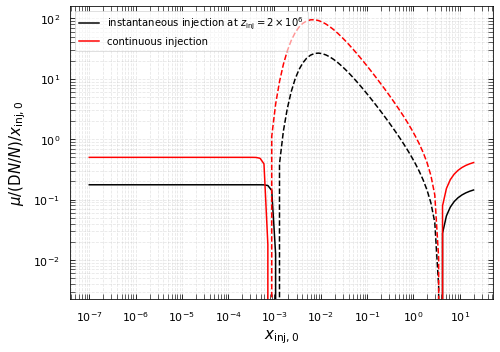

In [42]:
mu_over_DN_N = np.asarray(mu_over_DN_N)
mu_over_DN_N_continuous = np.asarray(mu_over_DN_N_continuous)

#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 11
title_size = 15
legend_size = 25
handle_length = 1.5




# ax.set_xlim(x_min,x_max)
# ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(r'$\mu/(\mathrm{D}N/N)/x_\mathrm{inj,0}$',size=title_size)
ax.set_xlabel(r'$x_\mathrm{inj,0}$',size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

#ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
# ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

# ax.plot(xi_array,mu_over_DN_N/xi_array,c='k',label='instantaneous injection')
# plt.ylim(-3.,0.5)
ax.plot(xi_array,(mu_over_DN_N)/xi_array,c='k',label='instantaneous injection at '+r'$z_\mathrm{inj}=2\times 10^6$')
ax.plot(xi_array,(mu_over_DN_N_continuous)/xi_array,c='r',label='continuous injection')
ax.plot(xi_array,-(mu_over_DN_N)/xi_array,c='k',ls='--')
ax.plot(xi_array,-(mu_over_DN_N_continuous)/xi_array,c='r',ls='--')




# plt.ylim(-2.,5)
#plt.xlim(1e-3,13)

ax.legend(loc=2,ncol=1,frameon=True,framealpha=0.6,fontsize = 10)

fig.tight_layout()
plt.savefig(path_to_figures + '/figures_for_paper_mu_int.pdf')
plt.show()
plt.close(fig)

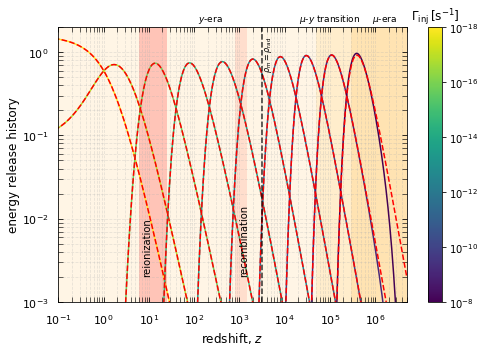

In [26]:
# path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/run_scripts_photon_injection_paper/figures/"
Gamma_inj_min = 1e-18
Gamma_inj_max = 1e-8
N_Gamma_inj = 10
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)


x_min = 1.e-1
x_max = 5.e6
ymin = 1.e-3
ymax = 2e0

ngamma = N_Gamma_inj 



#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 11
title_size = 12
legend_size = 25
handle_length = 1.5




ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel("redshift, "+ r'$z$',size=title_size)
ax.set_ylabel("energy release history",size=title_size)
ax.yaxis.set_label_coords(-.11,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


ax.axvspan(800., 1500, facecolor='red', alpha=0.1)
ax.text(0.52, 0.1, 'recombination', transform=ax.transAxes,color='k',rotation=90)

ax.axvspan(3.e5, x_max, facecolor='orange', alpha=0.3)
ax.text(0.9, 1.02, r'$\mu$-era', fontsize=9,
        transform=ax.transAxes,color='k',rotation=0)

ax.axvspan(5e4, 3e5, facecolor='orange', alpha=0.2)
ax.text(0.69, 1.02, r'$\mu$-$y$ transition', fontsize=9,transform=ax.transAxes,color='k',
        rotation=0)

ax.axvspan(x_min, 5e4, facecolor='orange', alpha=0.1)
ax.text(0.4, 1.02, r'$y$-era', fontsize=9, transform=ax.transAxes,color='k',rotation=0)



ax.axvspan(6., 25, facecolor='red', alpha=0.2)
ax.text(0.24, 0.1, 'reionization', transform=ax.transAxes,color='k',rotation=90)



color=iter(cm.viridis(np.linspace(1,0,ngamma)))



args = {}
args['param_values_array'] = Gamma_values
args['param_name'] = 'photon injection Gamma_dec'

ct = pi.cosmotherm()
ct.ct_pi_redshift_evolution_mode=1
R = ct.run_cosmotherm_parallel(**args)

for r,Gamma_asked in zip(R,Gamma_values):
    #print(Gamma_asked)

    col = next(color)
    slabel = r"$\Gamma_\mathrm{inj} = $"+scientific_notation(Gamma_asked)
    ax.plot(r["z"],r["dDrho_rhodt_rel"],c=col,label=slabel)
    
    ct.ct_Gamma_dec = Gamma_asked
    cosmo = pi.cosmo()
    pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
    #print(ct.ct_Gamma_dec)
    
    
    z_array = np.logspace(np.log10(cosmo.z_start),np.log10(cosmo.z_end),200)
    Drho_array=pi.Drho_rho_inj_at_z_normalized(z_array,cosmo,ct)

    ax.plot(z_array,np.abs(Drho_array),c='r',ls='--')      
    try:
        zX = pi.injection_redshift_zX(cosmo,ct)
        ax.axvline(zX)
    except:
        zX = 0.  

ax.axvline(cosmo.z_eq(),c='k',ls='--',alpha=0.8)
ax.text(0.588, 0.85, r'$\rho_\mathrm{m}=\rho_\mathrm{rad}$', fontsize=8,transform=ax.transAxes,color='k',rotation=90)

ax.loglog()
my_cmap = cm.viridis
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm)
cbar.set_ticks([0.,0.2,0.4,0.6,0.8,1.])
cbar.ax.set_yticklabels([r'$10^{-8}$',r'$10^{-10}$',r'$10^{-12}$',r'$10^{-14}$',r'$10^{-16}$',r'$10^{-18}$'])
cbar.ax.set_title(r'$\Gamma_\mathrm{inj}\,[\mathrm{s}^{-1}]$')

fig.tight_layout()
#plt.savefig(path_to_figures + '/spectra_for_paper_drho_rho.pdf')
plt.show()
plt.close(fig)

zX not found for Gamma=1.0000e-18
[1.550776909461254, 12.922977338393821, 75.05525683680904, 402.1852184848009, 1935.631435225287, 8021.516939934546, 30262.66513692389, 110322.80310499424, 398081.3761362017]


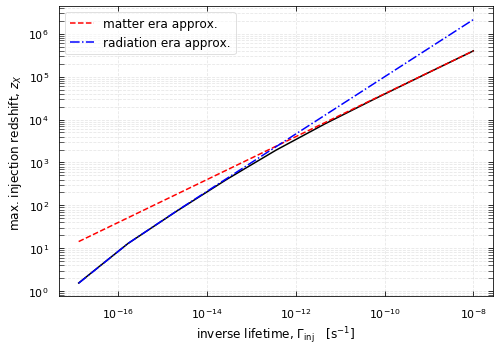

In [6]:
path_to_figures = "/Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/run_scripts_photon_injection_paper/figures/"
Gamma_inj_min = 1e-18
Gamma_inj_max = 1e-8
N_Gamma_inj = 10
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)


x_min = 1.e-1
x_max = 5.e6
ymin = 1.e-3
ymax = 2e0

ngamma = N_Gamma_inj 



#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 11
title_size = 12
legend_size = 25
handle_length = 1.5




# ax.set_xlim(x_min,x_max)
# ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel("max. injection redshift, "+ r'$z_X$',size=title_size)
ax.set_xlabel("inverse lifetime, "+r"$\Gamma_\mathrm{inj}\quad[\mathrm{s^{-1}}]$",size=title_size)
ax.yaxis.set_label_coords(-.08,0.5)


ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=120)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')


# ax.axvspan(800., 1500, facecolor='red', alpha=0.1)
# ax.text(0.52, 0.1, 'recombination', transform=ax.transAxes,color='k',rotation=90)

# ax.axvspan(3.e5, x_max, facecolor='orange', alpha=0.3)
# ax.text(0.9, 1.02, r'$\mu$-era', fontsize=9,
#         transform=ax.transAxes,color='k',rotation=0)

# ax.axvspan(5e4, 3e5, facecolor='orange', alpha=0.2)
# ax.text(0.69, 1.02, r'$\mu$-$y$ transition', fontsize=9,transform=ax.transAxes,color='k',
#         rotation=0)

# ax.axvspan(x_min, 5e4, facecolor='orange', alpha=0.1)
# ax.text(0.4, 1.02, r'$y$-era', fontsize=9, transform=ax.transAxes,color='k',rotation=0)



# ax.axvspan(6., 25, facecolor='red', alpha=0.2)
# ax.text(0.24, 0.1, 'reionization', transform=ax.transAxes,color='k',rotation=90)



color=iter(cm.viridis(np.linspace(1,0,ngamma)))



ct = pi.cosmotherm()
zX = []
gammas=[]
zX_rad = []
zX_mat = []
for Gamma_asked in Gamma_values:

    ct.ct_Gamma_dec = Gamma_asked
    ct.ct_Omega_m = 0.31
    cosmo = pi.cosmo()
    pi.set_cosmo_to_CT_cosmo_params(cosmo,ct)
    try:
        zX.append(pi.injection_redshift_zX(Gamma_asked,cosmo,ct))
        gammas.append(Gamma_asked)
        zX_rad.append(np.sqrt(Gamma_asked*cosmo.t_H0_in_s()/3./np.sqrt(cosmo.Omega_rel())))
        zX_mat.append((2.*Gamma_asked*cosmo.t_H0_in_s()/5./np.sqrt(cosmo.Omega_m()))**(2./3.)-1.)
    except:
        print('zX not found for Gamma=%.4e'%Gamma_asked)

ax.plot(gammas,zX,c='k')
ax.plot(gammas,zX_rad,c='r',ls='--',label='matter era approx.')
ax.plot(gammas,zX_mat,c='b',ls='-.',label='radiation era approx.')
print(zX)
ax.legend(loc=2,ncol=1,frameon=True,framealpha=0.6,fontsize = 12)
ax.loglog()

fig.tight_layout()
plt.savefig(path_to_figures + '/spectra_for_paper_zX.pdf')
plt.show()
plt.close(fig)